In [2]:
import numpy as np
from scipy.io import loadmat
#In this case, I took the trouble of saving it out to an old matlab 
#format that scipy uses. 
#if you have data in matlab files, pip install hdf5storage and use their 
#version of loadmat which works with matlab's new hdf5 format, and can 
# be written to flexibly preserve python and matlab structures. 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [3]:
#%% LOAD THE MAT FILE THAT HAS THE FACES 
f = loadmat('../data/faces.mat')
faces = f['faces'] #This are the faces.  There are 72 faces closely cropped to the boundary of the face.
smiling = f['smiling'][0] #Flag to indicate if the face was a smile. 0 means neutral expression and 1 means smiling.
#%% PCA 


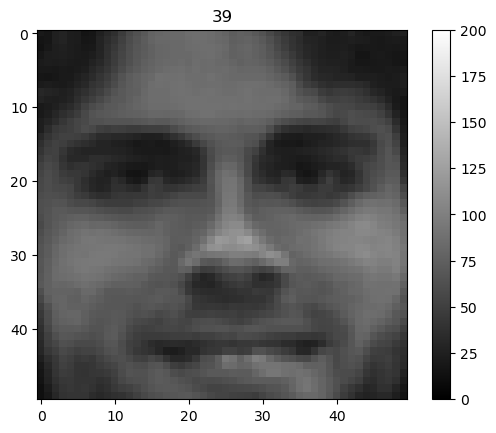

In [4]:
imageno  = 39
f1 = faces[imageno,:,:]
plt.figure()
plt.imshow(f1,cmap='gray',vmin = 0,vmax = 200)
plt.title(imageno)
plt.colorbar()
#plt.axis('off')

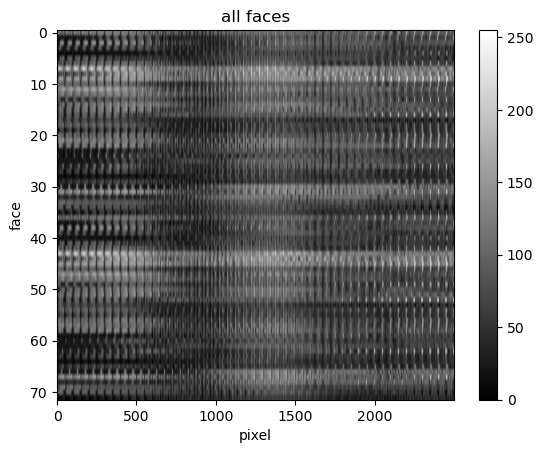

In [5]:
faces_data = faces.reshape(72,50*50)
plt.figure()
plt.imshow(faces_data,cmap='gray',vmin = 0,vmax = 255,aspect = "auto")
plt.title("all faces")
plt.xlabel("pixel")
plt.ylabel("face")
plt.colorbar()

(-0.5, 49.5, 49.5, -0.5)

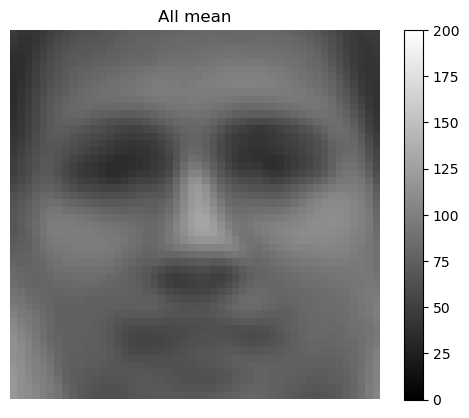

In [6]:
allmean = np.mean(faces,axis = 0)
plt.figure()
plt.imshow(allmean,cmap='gray',vmin = 0,vmax = 200)
plt.title("All mean")
plt.colorbar()
plt.axis("off")

In [7]:
pca = PCA(n_components = 71) #decide of number of components. ALWAYS smaller than the number of observations
                             #if you dont specify it, it will give you min(nsamples,nfeatures)-1
pca.fit(faces_data) #fit the model
eigenvector = pca.components_ #get the eigenvectors - components
latent = pca.explained_variance_ #get the eigenvalues - 
#normalized as explained variance
score = pca.transform(faces_data) # get the score, 
#"coordinate" of each face in the new pc coordinate system 
#%%

* All latent variable analyses begin by examining how much variance is expressed by each latent variable.  

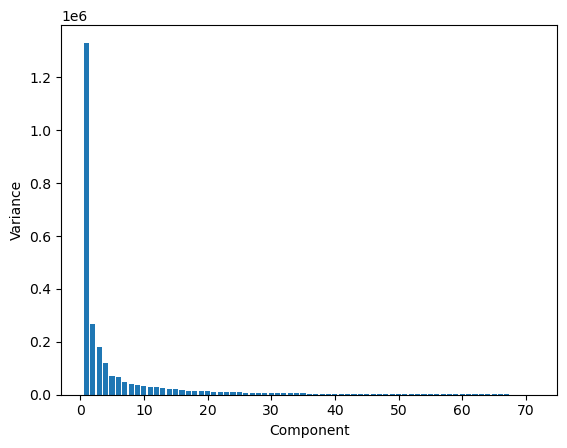

In [8]:
#ALWAYS PLOT LATENT FIRST
plt.figure()
plt.bar(range(1,72),latent)
plt.xlabel('Component')
plt.ylabel("Variance")
plt.show()



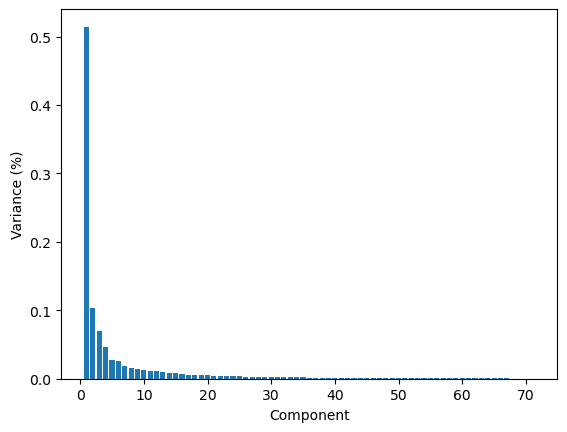

In [9]:
#Its more useful to express variance as a fraction of total. 
prct_latent = pca.explained_variance_ratio_
plt.figure()
plt.bar(range(1,72),prct_latent)
plt.xlabel('Component')
plt.ylabel("Variance (%)")
plt.show()

* This is pretty interesting. The first principal component accounts for more than half the variance in the data.  
* It quickly falls off, and by the 20th component, hardly any variability is left. 

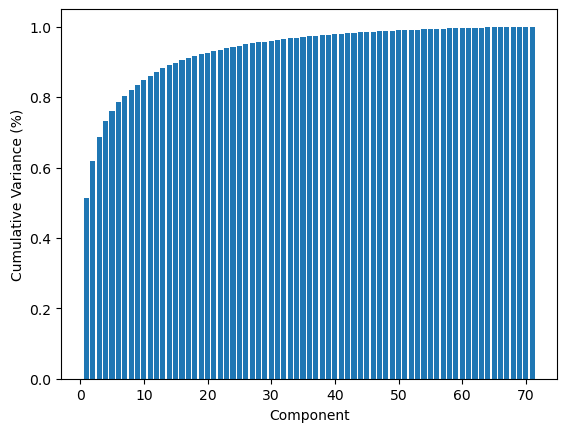

In [10]:
cum_latent = np.cumsum(prct_latent)
plt.figure()
plt.bar(range(1,72),cum_latent)
plt.xlabel('Component')
plt.ylabel("Cumulative Variance (%)")
plt.show()

* Like all good data analysis methods, PCA removes the mean of the data. You can get it back from the PCA object and it should look familiar to you. 
* When you apply it to data **where all the data are in the same units**, its fine to do it the way I did it. 
* If you are using data in different units, always use `StandardScaler` to put all the data in standardized units. 

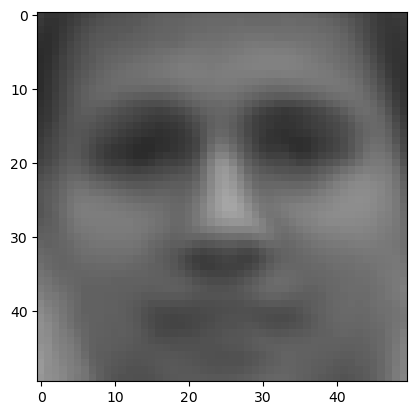

In [11]:
meanface = pca.mean_
mf = meanface.reshape(50,50)
plt.imshow(mf,cmap="gray",vmin = 0, vmax = 200)
plt.show()

* Visualize Eigenvectors

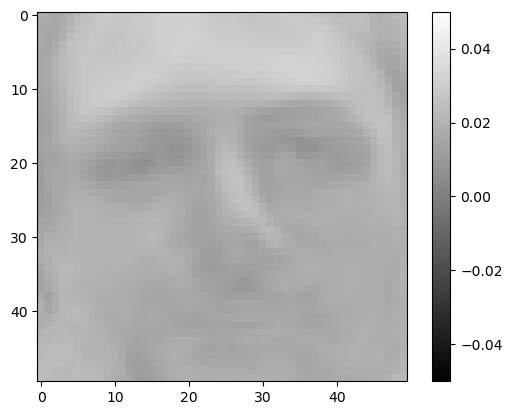

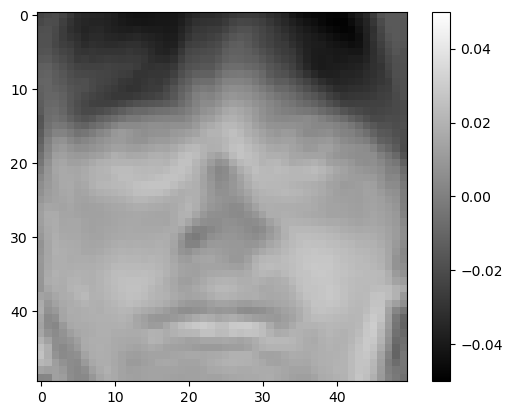

In [12]:
eigenfaces = eigenvector.reshape(71,50,50)
for j in range(2):
    plt.figure()
    plt.imshow(eigenfaces[j,:,:],cmap = 'gray',vmin = -0.05, vmax = 0.05)
    plt.colorbar()
    plt.show()


* Interpreting the Scores -> The coordinate of each face ("Loading") in the coordinate system defined by the eigenvectors

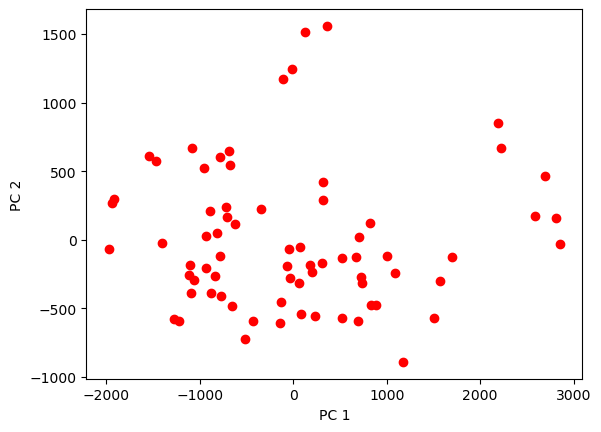

In [13]:
plt.figure()
plt.plot(score[:,0],score[:,1],'ro')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

* Any face can be approximated using the eigenfaces and the weights given by the score. 

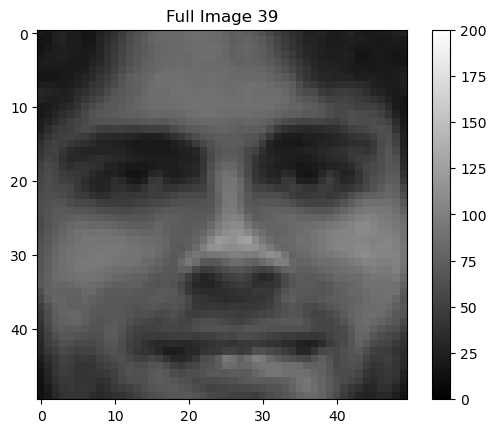

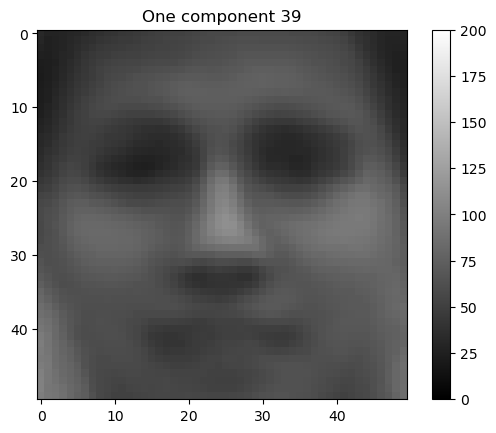

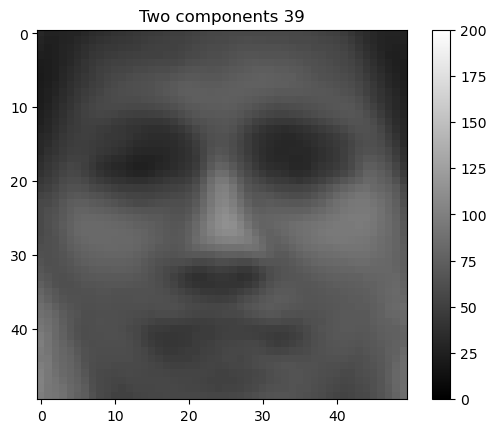

In [14]:
imageno  = 39
f1 = faces[imageno,:,:]
plt.figure()
plt.imshow(f1,cmap='gray',vmin = 0,vmax = 200)
plt.title("Full Image " + str(imageno))
plt.colorbar()
proj1 = score[imageno,0]*eigenvector[0,:]
makeface1 = proj1.reshape(50,50)+meanface.reshape(50,50)
plt.figure()
plt.imshow(makeface1,cmap='gray',vmin = 0,vmax = 200)
plt.title("One component " + str(imageno))
plt.colorbar()
makeface2 = score[imageno,0]*eigenvector[0,:]+score[imageno,1]*eigenvector[1,:]
makeface2 = makeface2.reshape(50,50)+meanface.reshape(50,50)

plt.figure()
plt.imshow(makeface2,cmap='gray',vmin = 0,vmax = 200)
plt.title("Two components " + str(imageno))
plt.colorbar()

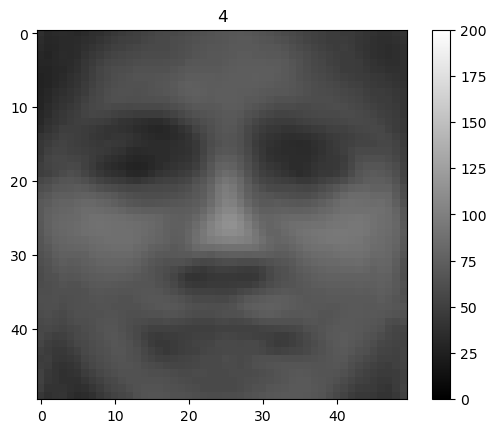

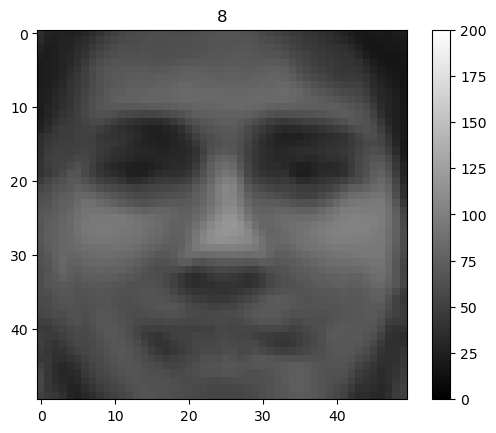

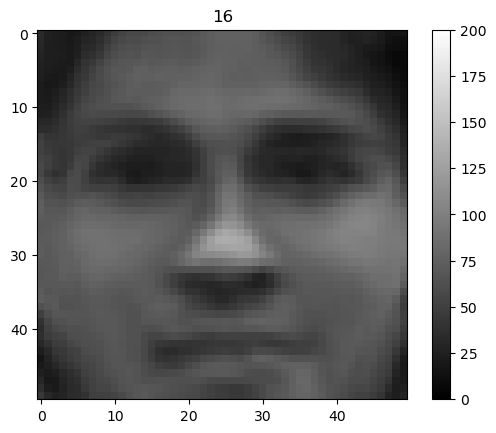

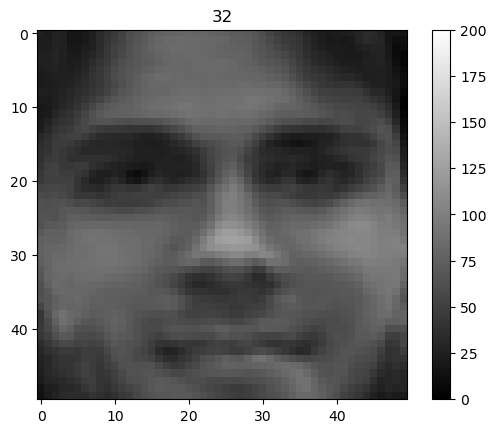

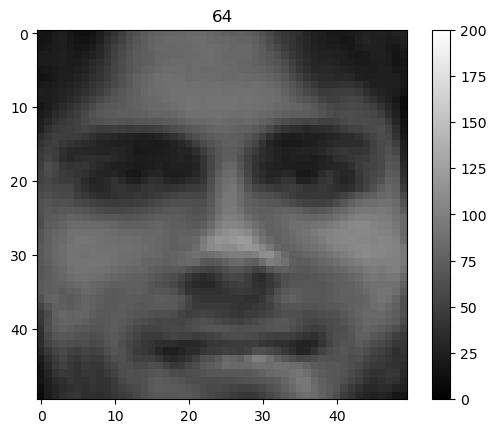

In [15]:
ncomp = [4,8,16,32,64]
for j in ncomp:
    compface = score[imageno,np.arange(j)]@eigenvector[np.arange(j),:]+meanface
    makeface = compface.reshape(50,50)
    plt.figure()
    plt.imshow(makeface,cmap='gray',vmin = 0,vmax = 200)
    plt.title(j)
    plt.colorbar()


Lets look at this through the lens of a singular value decomposition

$$ A = USV^T $$

In [16]:
meanface = np.mean(faces_data,axis = 0)
for j in range(72): 
    faces_data[j,:] = faces_data[j,:] - meanface


In [17]:
u,s,v = np.linalg.svd(faces_data,full_matrices=True)
print(u.shape)
print(s.shape)
print(v.shape)
print(s[0])
print(s[-1])

(72, 72)
(72,)
(2500, 2500)
9719.95694893179
8.168498811220484e-12


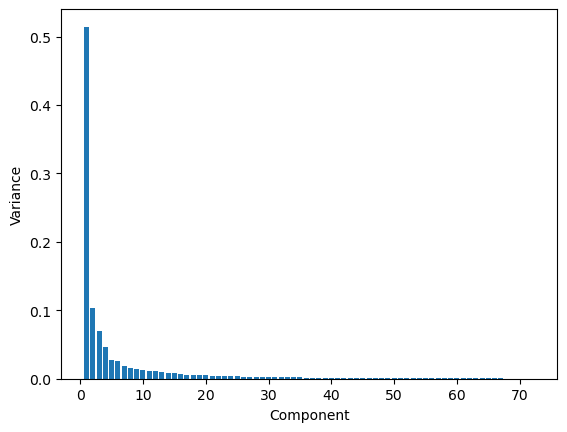

In [18]:
plt.figure()
plt.bar(range(1,73),s**2/sum(s**2))
plt.xlabel('Component')
plt.ylabel("Variance")
plt.show()

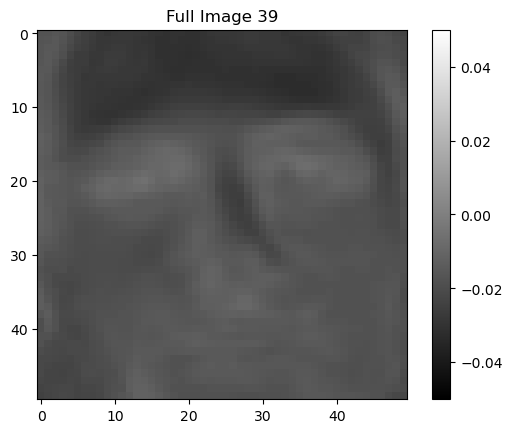

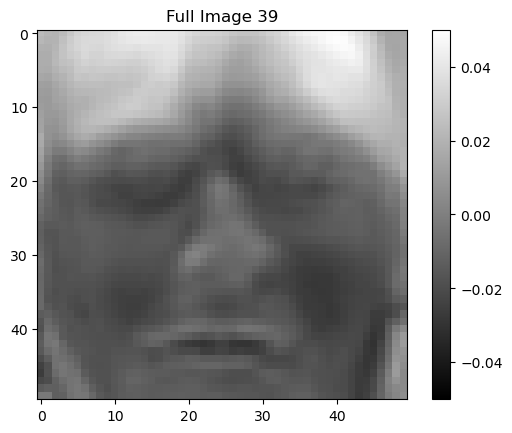

In [19]:

plt.figure()
plt.imshow(v[0,:].reshape(50,50),cmap='gray', vmin = -0.05, vmax = 0.05)
plt.title("Full Image " + str(imageno))
plt.colorbar()
plt.figure()
plt.imshow(v[1,:].reshape(50,50),cmap='gray',vmin = -0.05, vmax =0.05)
plt.title("Full Image " + str(imageno))
plt.colorbar()

In [20]:
x = np.dot(v[0,:],v[1,:])
print(x)

-1.966742740888705e-16


In [21]:
y = np.dot(u[:,0],u[:,1])
print(y)

1.8388068845354155e-16


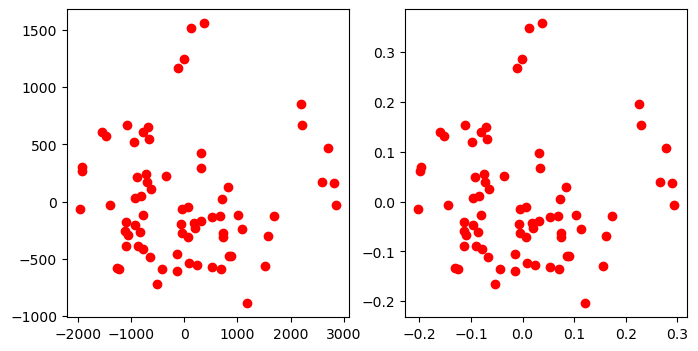

In [22]:
fig, ax = plt.subplots(1,2,figsize = (8,4))
ax[0].plot(score[:,0],score[:,1],'ro')
ax[1].plot(-u[:,0],-u[:,1],'ro')


### PCA Classifier model

The goal of this data set is to classify smiling faces from neutral faces. 
1. test-train split 
2. develop a PCA model 
3. decide how to use the scores (one at a time, versus combining them, based on my goals)
4. develop a classifier model on the PCA scores 
5. test on test data.  
6. interpret  

In [23]:
# test-train split
# I'm going to have 48 training images and 24 test images to begin with.
X_train, X_test, y_train, y_test = train_test_split(faces_data,smiling,train_size=48,test_size=24,random_state = 111)



* At this point, with different data I might choose to develop a standard scaler.   Here I will not.
* Its important to note that i still need to save the mean of my training data. 
* The mean of the training data is part of the model, even if I dont use a standardization. 
* I also need to save the eigenvectors, to know what my PCA components weight on the original variables.  


In [33]:
pca = PCA(n_components = 47) #decide of number of components. ALWAYS smaller than the number of observations
                             #if you dont specify it, it will give you min(nsamples,nfeatures)-1
pca.fit(X_train) #fit the model
eigenvector = pca.components_ #get the eigenvectors - components
latent = pca.explained_variance_ #get the eigenvalues - 
#normalized as explained variance
latent_ratio = pca.explained_variance_ratio_
score_train = pca.transform(X_train) # get the score, 
score_test = pca.transform(X_test)

#If you want to know what transform means
#for j in range(X_test.shape[0]):
#    X_test[j,:] = X_test[j,:]-pca.mean_
#
#score_test2 = X_test@np.transpose(eigenvector)


* Do a quick check of the latent space. 

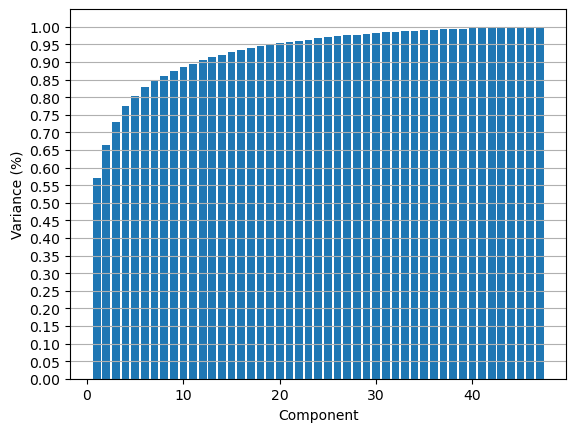

In [34]:
plt.figure()
plt.bar(range(1,48),np.cumsum(latent_ratio))
plt.xlabel('Component')
plt.ylabel("Variance (%)")
plt.yticks(np.arange(0,1.05,0.05))
plt.grid(axis = 'y')
plt.show()

* I need scores in order to build my classifier model.  

* Here I just put it all in there.  

0.8333333333333334


<BarContainer object of 47 artists>

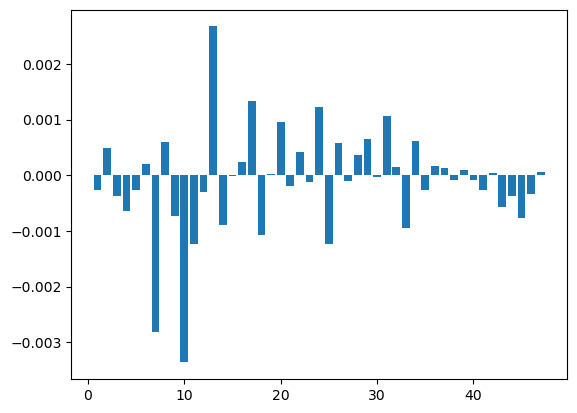

In [35]:
clfCV = LogisticRegressionCV(cv = 4, solver = 'saga',tol = 0.1, max_iter = 1000,n_jobs=-1)
clfCV.fit(score_train,y_train)
score = clfCV.score(score_test,y_test)
print(score)
coef = clfCV.coef_
plt.bar(np.arange(1,48),coef[0])

* The plot above is a bit distorted because of the way PCA puts the magnitude information into the Scores.  I can fix this by multiplying the coefficients by the square root of the eigenvalues. 
* Or you could use a SVD on faces_data after removing the column means.  The left singular vectors (u) contain the "Scores"

<BarContainer object of 47 artists>

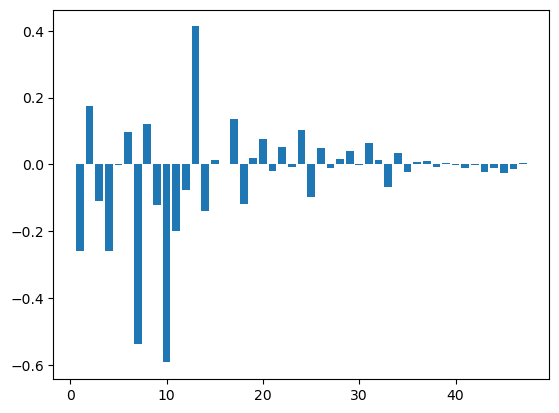

In [28]:
plt.bar(np.arange(1,48),coef[0]*np.sqrt(latent))

* Here I will be a little more nuanced about it, and keep the first 19 components only. 

0.75


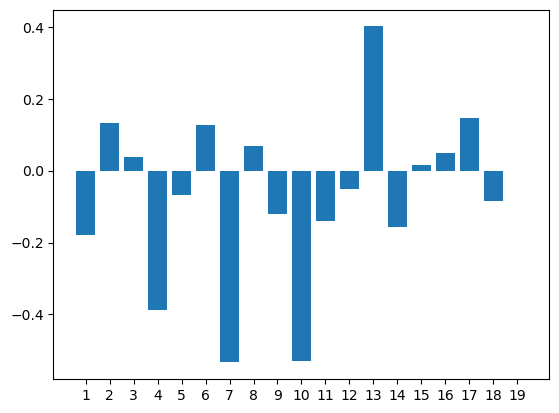

In [49]:
clfCV.fit(score_train[:,0:19],y_train)
score = clfCV.score(score_test[:,0:19],y_test)
print(score)
coef = clfCV.coef_
plt.bar(np.arange(1,20),coef[0]*np.sqrt(latent[0:19]))
plt.xticks(np.arange(1,20))
plt.show()

* The book recommends you optimize over the number of components, which I dont like.  

* 

<BarContainer object of 48 artists>

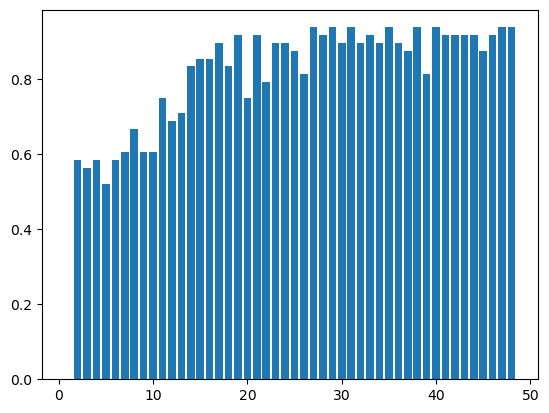

In [52]:
clfCVM = LogisticRegressionCV(cv = 4, solver = 'saga',tol = 0.1, max_iter = 1000,n_jobs=-1)
Mscore = np.zeros(48)
for M in range(1,48):
    clfCV.fit(score_train[:,0:M],y_train)
    Mscore[M] = clfCV.score(score_train[:,0:M],y_train)
plt.bar(np.arange(1,49),Mscore)

<BarContainer object of 48 artists>

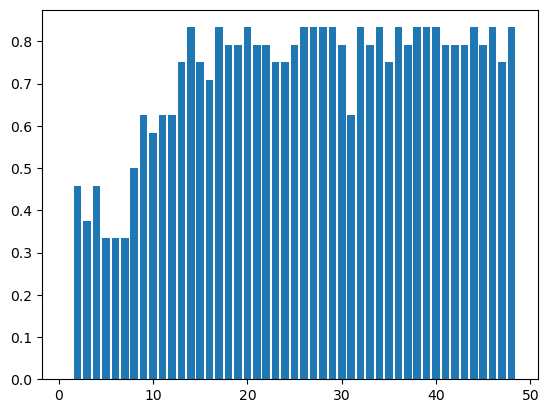

In [51]:
clfCVM = LogisticRegressionCV(cv = 4, solver = 'saga',tol = 0.1, max_iter = 1000,n_jobs=-1)
Mscore = np.zeros(48)
for M in range(1,48):
    clfCVM.fit(score_train[:,0:M],y_train)
    Mscore[M] = clfCVM.score(score_test[:,0:M],y_test)
plt.bar(np.arange(1,49),Mscore)

The problem with doing this is that Ive used up my test data. 

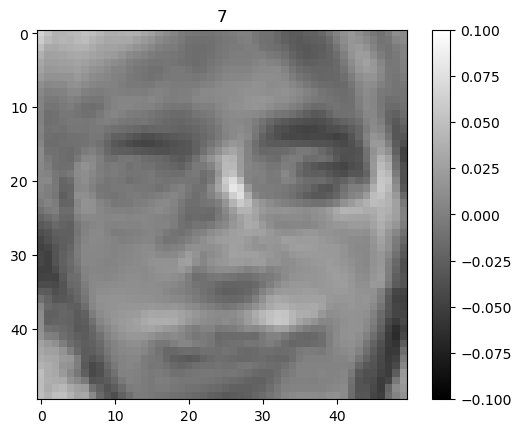

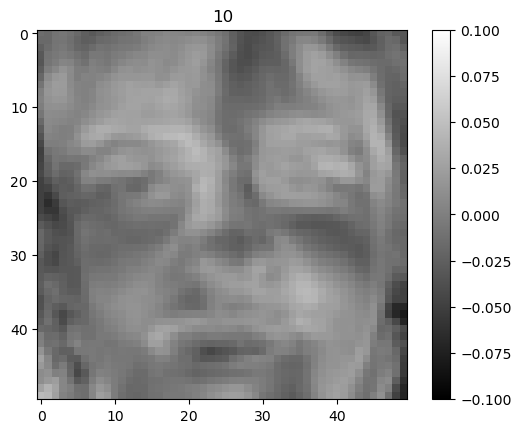

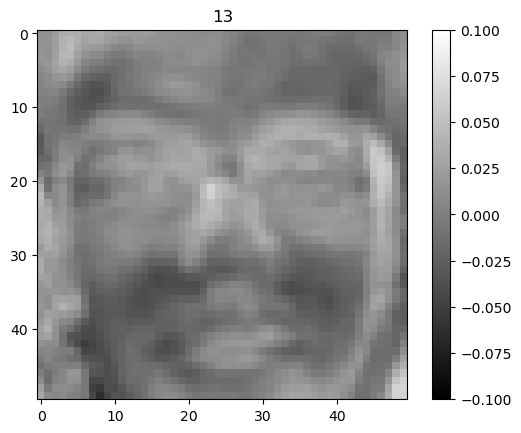

In [54]:
eigenfaces = eigenvector.reshape(47,50,50)
for j in [6,9,12]:
    plt.figure()
    plt.imshow(eigenfaces[j,:,:],cmap = 'gray',vmin = -0.1, vmax = 0.1)
    plt.title(str(j+1))
    plt.colorbar()
    plt.show()

*The right way to interpret this model is to project back to the data space

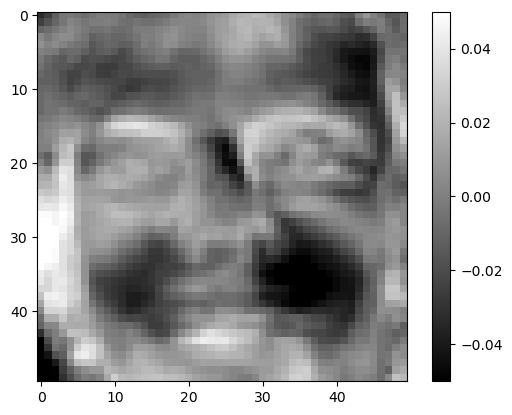

In [60]:
bx = np.zeros(50*50)
for j in range(19):
    bx = bx + coef[0][j]*np.sqrt(latent[j])*eigenvector[j,:]
bx = bx.reshape(50,50)

plt.figure()
plt.imshow(bx,cmap = 'gray',vmin = -0.05, vmax = 0.05)
plt.colorbar()